<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_Colabs/blob/main/ML_S8_K_Means_27JL23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Importing Numpy
import numpy as np

#  Importing Pandas
import pandas as pd

#  Importing Matplotlib.pyplot
import matplotlib.pyplot as plt

#  Importing Seaborn for special plots
import seaborn as sns

#  Importing KMeans from sklearn.cluster
from sklearn.cluster import KMeans

In [ ]:
#  Reading a CSV file with the data and assigning it to a dataframe called "data"
data=pd.read_csv('https://gist.githubusercontent.com/javierIA/0e388f3d74a0fedd21f33e8f48d144ff/raw/d884d7fab9313ef6f6db291f0307cc569fbb533d/custumers.csv', "\t")
data

<ipython-input-2-4818651daa1c>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data=pd.read_csv('https://gist.githubusercontent.com/javierIA/0e388f3d74a0fedd21f33e8f48d144ff/raw/d884d7fab9313ef6f6db291f0307cc569fbb533d/custumers.csv', "\t")


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#  Displaying the general info for the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#  Looking for any null values in the dataframe
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [ ]:
#  Selecting the columns "Anual_Income" and "Spending_Score" to create an array with the data to classify
x=data[["Annual_Income_(k$)", "Spending_Score"]].values

#  Displaying the data on the array
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## K-Means Clustering
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

This algorithm requires the number of clusters to be specified.

It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

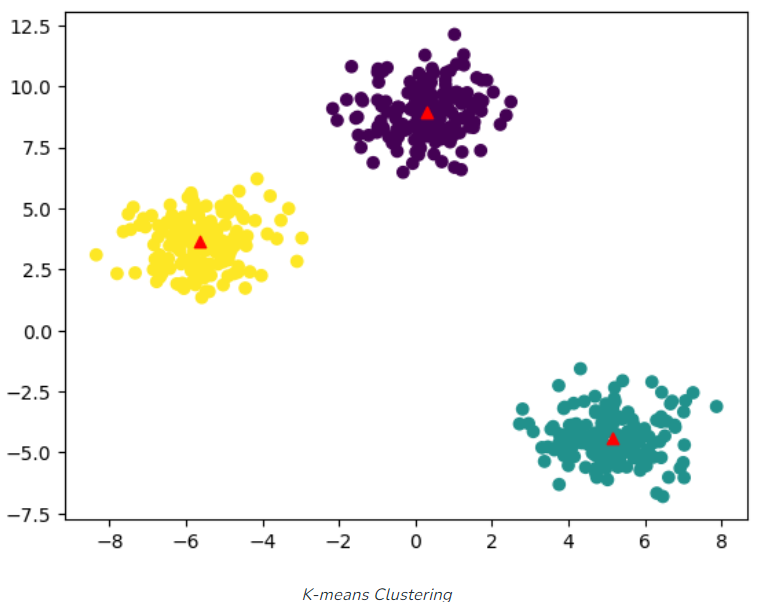

The k-means algorithm divides a set of *N* samples *X* into *K* disjoint clusters *C*, each described by the mean *K*image.png of the samples in the cluster.

The means are commonly called the cluster “centroids”; note that they are not, in general, points from *X*, although they live in the same space.

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion:

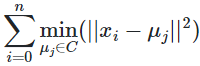

Inertia can be recognized as a measure of how internally coherent clusters are.

It suffers from various drawbacks:

    Inertia makes the assumption that clusters are convex and isotropic, which is not always the case.
    It responds poorly to elongated clusters, or manifolds with irregular shapes.

    Inertia is not a normalized metric: we just know that lower values are better and zero is optimal.
    But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”).
    Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

K-means is often referred to as Lloyd’s algorithm.

In basic terms, the algorithm has three steps.

The first step chooses the initial centroids, with the most basic method being to choose *k* samples from the dataset *X*.

After initialization, K-means consists of looping between the two other steps.

The first step assigns each sample to its nearest centroid.

The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid.

The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold.

In other words, it repeats until the centroids do not move significantly.

K-means is equivalent to the expectation-maximization algorithm with a small, all-equal, diagonal covariance matrix.

The algorithm can also be understood through the concept of Voronoi diagrams.

First the Voronoi diagram of the points is calculated using the current centroids.

Each segment in the Voronoi diagram becomes a separate cluster.

Secondly, the centroids are updated to the mean of each segment.

The algorithm then repeats this until a stopping criterion is fulfilled.

Usually, the algorithm stops when the relative decrease in the objective function between iterations is less than the given tolerance value.

This is not the case in this implementation: iteration stops when centroids move less than the tolerance.

Given enough time, K-means will always converge, however this may be to a local minimum.

This is highly dependent on the initialization of the centroids.

As a result, the computation is often done several times, with different initializations of the centroids.

One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='k-means++' parameter).

This initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization

###  sklearn.cluster.KMeans

**class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')**

**Parameters:**

    n_clusters : int, default=8
    The number of clusters to form as well as the number of centroids to generate.

    init : {‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
    Method for initialization:

        ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia.
        This technique speeds up convergence.
        The algorithm implemented is “greedy k-means++”.
        It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

        ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

    n_init : ‘auto’ or int, default=10
    Number of times the k-means algorithm is run with different centroid seeds.
    The final results is the best output of n_init consecutive runs in terms of inertia.
    Several runs are recommended for sparse high-dimensional problems (see Clustering sparse data with k-means).

    When n_init='auto', the number of runs depends on the value of init: 10 if using init='random' or init is a callable; 1 if using init='k-means++' or init is an array-like.

    max_iter : int, default=300
    Maximum number of iterations of the k-means algorithm for a single run.

    tol : float, default=1e-4
    Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

    verbose : int, default=0
    Verbosity mode.

    random_state : int, RandomState instance or None, default=None
    Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

    copy_x : bool, default=True
    When pre-computing distances it is more numerically accurate to center the data first.
    If copy_x is True (default), then the original data is not modified.
    If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False.
    If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.

    algorithm : {“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”
    K-means algorithm to use.
    The classical EM-style algorithm is "lloyd".
    The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality.
    However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

    "auto" and "full" are deprecated and they will be removed in Scikit-Learn 1.3. They are both aliases for "lloyd".

**Attributes:**

    cluster_centers_ : ndarray of shape (n_clusters, n_features)
    Coordinates of cluster centers.
    If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

    labels_ : ndarray of shape (n_samples,)
    Labels of each point

    inertia_ : float
    Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

    n_iter_ : int
    Number of iterations run.

    n_features_in_ : int
    Number of features seen during fit.

    feature_names_in_ : ndarray of shape (n_features_in_,)
    Names of features seen during fit.
    Defined only when X has feature names that are all strings.


**Methods**

    fit(X[, y, sample_weight])
    Compute k-means clustering.

    fit_predict(X[, y, sample_weight])
    Compute cluster centers and predict cluster index for each sample.

    fit_transform(X[, y, sample_weight])
    Compute clustering and transform X to cluster-distance space.

    get_feature_names_out([input_features])
    Get output feature names for transformation.

    get_metadata_routing()
    Get metadata routing of this object.

    get_params([deep])
    Get parameters for this estimator.

    predict(X[, sample_weight])
    Predict the closest cluster each sample in X belongs to.

    score(X[, y, sample_weight])
    Opposite of the value of X on the K-means objective.

    set_fit_request(*[, sample_weight])
    Request metadata passed to the fit method.

    set_output(*[, transform])
    Set output container.

    set_params(**params)
    Set the parameters of this estimator.

    set_predict_request(*[, sample_weight])
    Request metadata passed to the predict method.

    set_score_request(*[, sample_weight])
    Request metadata passed to the score method.

    transform(X)
    Transform X to a cluster-distance space.

In [ ]:
#  Defining a KMeans type model with 2 clusters
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans

KMeans(n_clusters=2, random_state=42)

In [ ]:
#  Using the array data (x) to fit the model
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

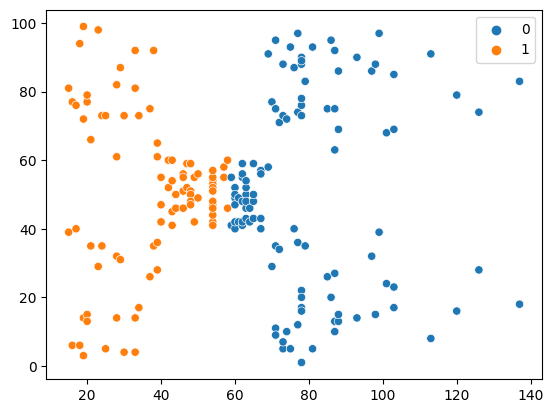

In [ ]:
#  Plotting the resulting clusters
sns.scatterplot(x=x[:,0], y=x[:,1], hue=kmeans.labels_)
plt.show()

In [ ]:
codo=[]

for i in range (1,11):
  kmeans=KMeans(n_clusters=2, random_state=42)
  kmeans_y=kmeans.fit(x)
  codo.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=x[1,10], y=codo[1,10], color="red")

IndexError: ignored

<Figure size 1000x500 with 0 Axes>

In [ ]:
codo=[]

for i in range (1,11):
  kmeans=KMeans(n_clusters=5, random_state=42)
  kmeans_y=kmeans.fit(x)
  codo.append(kmeans.inertia_)

In [ ]:
kmeans.fit(x)

In [ ]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=kmeans.labels_)
plt.show()